In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

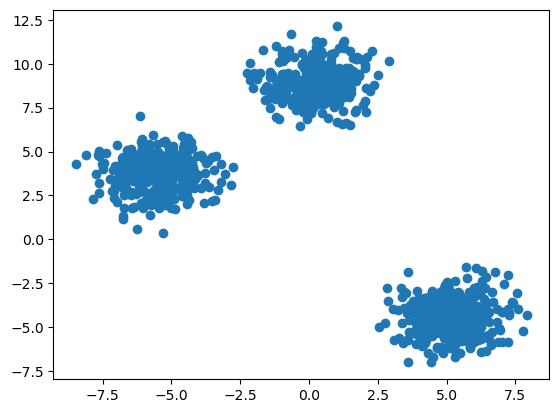

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [15]:
# Manual Process
# Elbow Method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1180.7986959719217,
 1033.0898296839703,
 904.1667803002026,
 830.1066896821391,
 719.5669248664387,
 579.8289866187472,
 537.1522114491809]

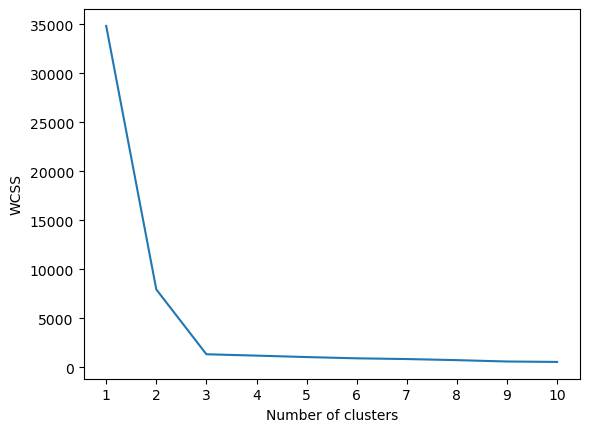

In [17]:
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
y_labels = kmeans.fit_predict(X_train)

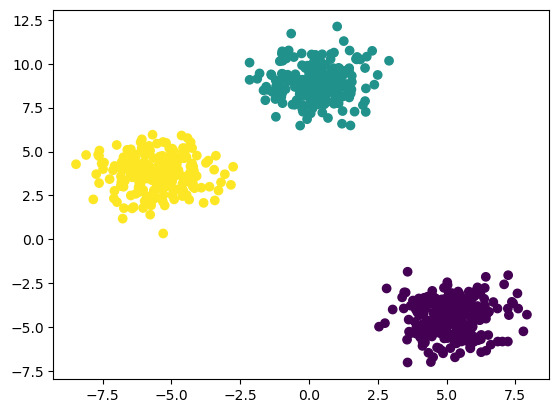

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)
plt.show()

In [25]:
y_test_labels = kmeans.predict(X_test)

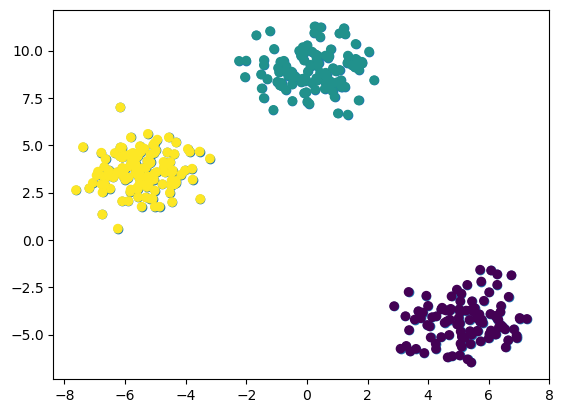

In [26]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test_labels)
plt.show()

In [28]:
# knee locator
!pip install kneed

In [29]:
from kneed import KneeLocator

In [31]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [33]:
# performance metrics
# silhouette score
from sklearn.metrics import silhouette_score

In [35]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [36]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6304305619015008,
 0.4783511740341074,
 0.3375447395994776,
 0.30918290927832753,
 0.3371002278388996,
 0.3420518735039214,
 0.3420468332594623]

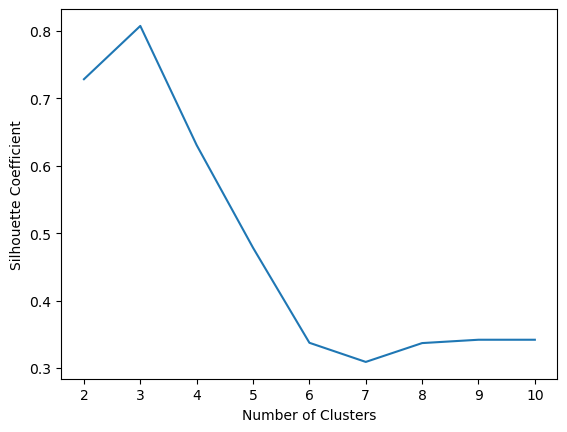

In [37]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()